In [ ]:
# Mount Google Drive Where you have saved the .h5 file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import tensorflow_hub as hub

In [ ]:


# Register custom objects
custom_objects = {'KerasLayer': hub.KerasLayer}

# Load the pre-trained model with custom objects ( paste the path to the .h5 file here)
model = tf.keras.models.load_model('/content/drive/MyDrive/bit-custom.h5', custom_objects=custom_objects)

# Function to preprocess the uploaded image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # normalize to [0,1]
    return img_array

# Function to predict the presence of monkeypox
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    return predictions




Saving M49_02.jpg to M49_02.jpg


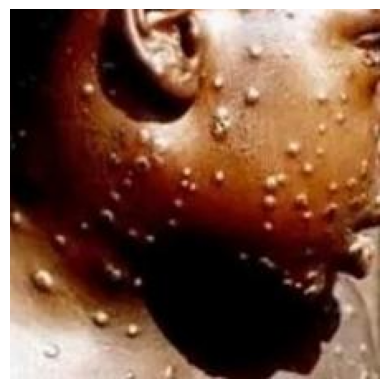

1/1 [==============================] - 0s 328ms/step
Predicted class: Monkeypox with accuracy: 99.36%
Class probabilities: [[4.0452755e-03 1.3336025e-03 9.9364752e-01 9.7360695e-04]]


In [ ]:
# Upload image
uploaded = files.upload()

for fn in uploaded.keys():
    # Display the image
    img = Image.open(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Predict the image
    predictions = predict_image(fn)
    class_names = ['Chickenpox', 'Measles', 'Monkeypox', 'Normal']  # Update based on your class names
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    predicted_accuracy = predictions[0][predicted_class_index]

    print(f'Predicted class: {predicted_class} with accuracy: {predicted_accuracy:.2%}')
    print(f'Class probabilities: {predictions}')

# You will be prompted to upload an image which you want to test